## Análisis de Componentes Principales

Ejemplo adaptado de [link](https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-with-python/) y extendido por Germán Braun

In [2]:
#Importar librerías
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Crear dataset ejemplo
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age': [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}
df = pd.DataFrame(data)
print(df)

   Height  Weight  Age  Gender
0     170      65   30       1
1     165      59   25       0
2     180      75   35       1
3     175      68   28       1
4     160      55   22       0
5     172      70   32       1
6     168      62   27       0
7     177      74   33       1
8     162      58   24       0
9     158      54   21       0


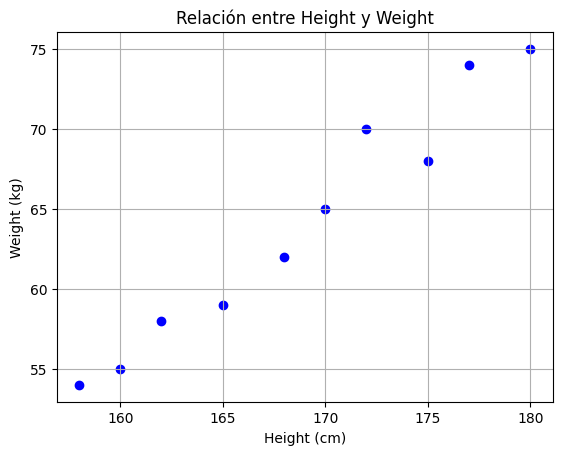

In [ ]:
#Visualizar correlación entre Height y Weight
plt.scatter(df['Height'], df['Weight'], color='blue')
plt.title('Relación entre Height y Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

In [ ]:
#Ejemplo de media y sd
mean_height = df['Height'].mean()
std_height = df['Height'].std()

print("Media de Height:", mean_height)
print("Desviación estándar de Height:", std_height)

Media de Height: 168.7
Desviación estándar de Height: 7.439384681843282


In [ ]:
#Estandarizar datos
X = df.drop(['Gender','Age'], axis=1)
y = df['Gender']

scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(X)

# Convertir de nuevo a DataFrame
df_scaled = pd.DataFrame(df_scaled_array, columns=X.columns)
print(df_scaled)

     Height    Weight
0  0.184198  0.138675
1 -0.524256 -0.693375
2  1.601106  1.525426
3  0.892652  0.554700
4 -1.232710 -1.248075
5  0.467580  0.832050
6 -0.099184 -0.277350
7  1.176034  1.386750
8 -0.949329 -0.832050
9 -1.516092 -1.386750


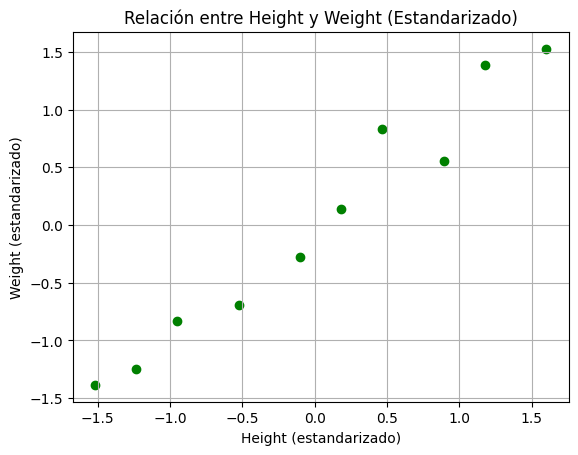

In [ ]:
#Visualizar datos estandarizados
plt.scatter(df_scaled['Height'], df_scaled['Weight'], color='green')
plt.title('Relación entre Height y Weight (Estandarizado)')
plt.xlabel('Height (estandarizado)')
plt.ylabel('Weight (estandarizado)')
plt.grid(True)
plt.show()

In [1]:
#Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled_array)

print(X_pca)

NameError: name 'PCA' is not defined

In [ ]:
# Eigenvectores
print("Eigenvectores (componentes principales):")
eigenvectors = pca.components_
eigenvectors_df = pd.DataFrame(eigenvectors, columns=X.columns)
print(eigenvectors_df)

Eigenvectores (componentes principales):
     Height    Weight
0  0.707107  0.707107
1  0.707107 -0.707107


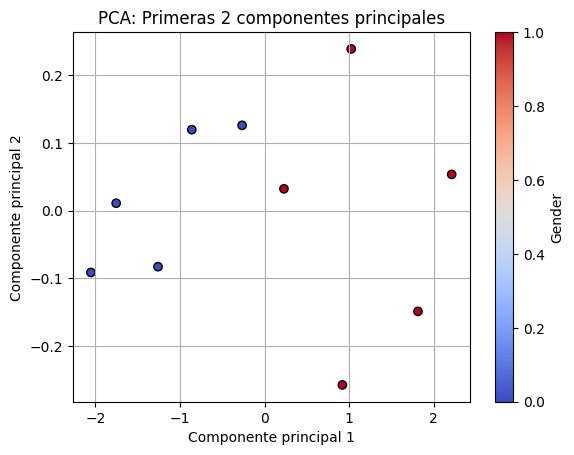

In [ ]:
#Visualizar nuevo dataset
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA: Primeras 2 componentes principales')
plt.colorbar(label='Gender')  # opcional para ver el target
plt.grid(True)
plt.show()

In [ ]:

projection_first_row = np.dot(df_scaled_array[0], pca.components_.T)
print("Proyección de la primera fila sobre los eigenvectores:")
print(projection_first_row)

# X_pca es la proyección de los datos sobre los eigenvectores
X_pca_df = pd.DataFrame(X_pca, columns=['Height', 'Weight'])
print("Proyección de los datos sobre los eigenvectores (componentes principales):")
print(X_pca_df)

Proyección de la primera fila sobre los eigenvectores:
[0.22830577 0.03218964]
Proyección de los datos sobre los eigenvectores (componentes principales):
     Height    Weight
0  0.228306  0.032190
1 -0.860995  0.119585
2  2.210792  0.053514
3  1.023433  0.238968
4 -1.754180  0.010865
5  0.918977 -0.257720
6 -0.266250  0.125983
7  1.812162 -0.148999
8 -1.259625 -0.082928
9 -2.052619 -0.091458
